### Loading the super-tensor and creating the temporal networks

To load the super tensor and compute the netowork measures on the data the class __temporal_network__ is used.

In [1]:
import numpy                 as     np
import matplotlib.pyplot     as     plt
from   GDa.temporal_network  import temporal_network

To instantiate the __temporal_network__ we have to supply the monkey name, the session, and date to its constructor.

In [2]:
# Instantiating a temporal network object
net =  temporal_network(monkey='lucy', date=150128, session=1)

When instantiated the temporal network object will load the recording info for the monkey, date, and sesion specified as well as the super tensor;

The super-tensor has dimensions [Number of pairs, Number of frequency bands, Number of trials * Time]. So far we are using the following bands:

- $\theta$  = [4,8[    Hz;
- $\alpha$  = [8,15[   Hz;
- $\beta$   = [15,30[  Hz;
- $\gamma$  = [30,60[  Hz;

Next, we can plot the supertensor (for better visualization bellow we plot only for ten trials):

Text(0.5, 0, 'Time (s)')

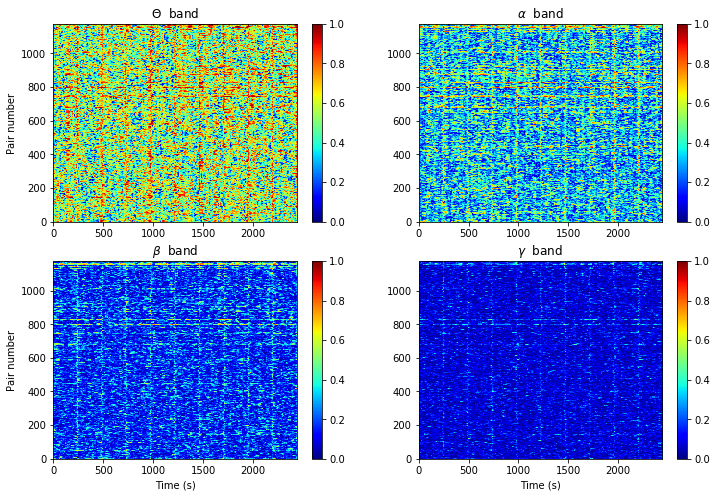

In [3]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(net.super_tensor[:,0,:2440], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(net.super_tensor[:,1,:2440], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(net.super_tensor[:,2,:2440], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(net.super_tensor[:,3,:2440], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

The super tensor can be converted to a adjacency tensor by using the method __convert_to_adjacency__:

In [4]:
net.convert_to_adjacency()

The adjacency tensor has dimensions $[nC, nC,bands,Trials*time]$, where $nC$ is the number of channels, and bands the number of frequency bands.

In [5]:
print('Adjacency tensor shape = ' + str( net.A.shape) )

Adjacency tensor shape = (49, 49, 4, 131760)


Let's plot one layer of the adjacency tensor below:

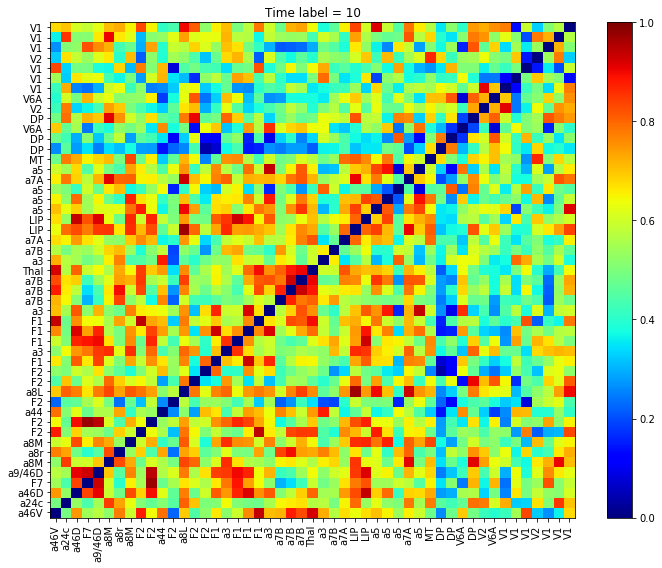

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(net.A[:,:,0,10]+net.A[:,:,0,10].T,aspect='auto',cmap='jet',origin='lower', vmin=0, vmax=1);plt.colorbar()
plt.title('Time label = ' + str(10))
plt.xticks(range(49), net.session_info['areas'], rotation = 90)
plt.yticks(range(49), net.session_info['areas'])
plt.tight_layout()

In [7]:
net.compute_nodes_strength()

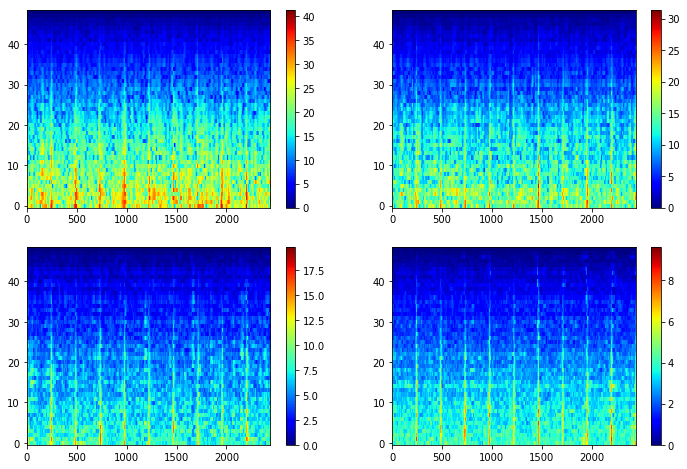

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(net.node_degree[:,0,:2440], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(net.node_degree[:,1,:2440], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(net.node_degree[:,2,:2440], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(net.node_degree[:,3,:2440], aspect = 'auto', cmap = 'jet', origin = 'lower'); plt.colorbar()

In [9]:
net.create_stages_time_grid()

In [10]:
stages = np.zeros([net.session_info['nT'],len(net.tarray)])
ii     = [net.t_baseline.reshape(net.session_info['nT'],len(net.tarray)), 
          net.t_cue.reshape(net.session_info['nT'],len(net.tarray)), 
          net.t_delay.reshape(net.session_info['nT'],len(net.tarray)),
          net.t_match.reshape(net.session_info['nT'],len(net.tarray))]
for i in range(4):
    stages = stages - i * ii[i]

Text(0.5, 0, 'Time')

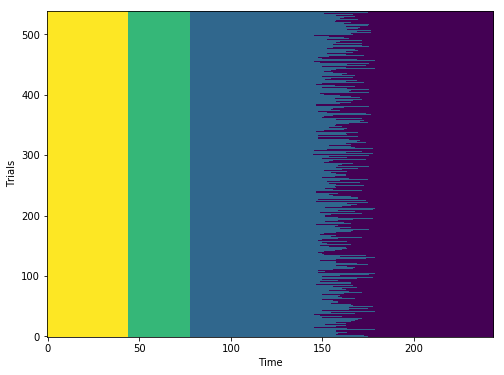

In [11]:
plt.figure(figsize = (8,6))
plt.imshow(stages, aspect='auto',cmap='viridis',origin='lower')
plt.ylabel('Trials')
plt.xlabel('Time')

In [12]:
net.super_tensor.shape

(1176, 4, 131760)

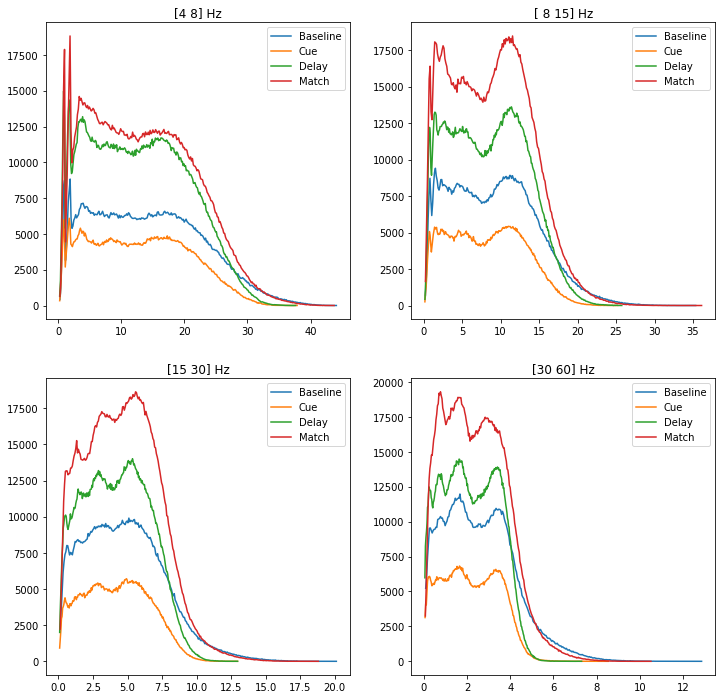

In [13]:
plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    n1,x1 = np.histogram(net.node_degree[:,i,net.t_baseline], 300)
    n2,x2 = np.histogram(net.node_degree[:,i,net.t_cue], 300)
    n3,x3 = np.histogram(net.node_degree[:,i,net.t_delay], 300)
    n4,x4 = np.histogram(net.node_degree[:,i,net.t_match], 300)
    plt.plot(x1[2:], n1[1:], label='Baseline')
    plt.plot(x2[2:], n2[1:], label='Cue')
    plt.plot(x3[2:], n3[1:], label='Delay')
    plt.plot(x4[2:], n4[1:], label='Match')
    plt.title(str(net.bands[i]) + ' Hz')
    plt.legend()

In [14]:
net.session_info.keys()

dict_keys(['nC', 'nP', 'nT', 'pairs', 'indt', 'fsample', 'tarray', 'channels_labels', 'dcue', 'dsm', 'stim', 'indch', 'areas', 't_cue_on', 't_cue_off', 't_match_on'])

In [15]:
net.session_info['channels_labels']

array(['1', '4', '9', '13', '16', '17', '22', '23', '26', '27', '29',
       '34', '39', '43', '54', '63', '66', '92', '95', '105', '106',
       '110', '121', '122', '127', '128', '132', '134', '135', '146',
       '148', '149', '150', '156', '161', '176', '177', '178', '183',
       '201', '203', '205', '210', '219', '221', '224', '242', '248',
       '250'], dtype='<U3')

In [16]:
net.session_info['areas']

array(['a46V', 'a24c', 'a46D', 'F7', 'a9/46D', 'a8M', 'a8r', 'a8M', 'F2',
       'F2', 'a44', 'F2', 'a8L', 'F2', 'F2', 'F1', 'a3', 'F1', 'F1', 'F1',
       'a3', 'a7B', 'a7B', 'a7B', 'Thal', 'a3', 'a7B', 'a7A', 'LIP',
       'LIP', 'a5', 'a5', 'a5', 'a7A', 'a5', 'MT', 'DP', 'DP', 'V6A',
       'DP', 'V2', 'V6A', 'V1', 'V1', 'V1', 'V2', 'V1', 'V1', 'V1'],
      dtype=object)

In [17]:
from GDa.graphics.plot_brain_sketch import plot_node_brain_sketch, plot_edge_brain_sketch

In [18]:
#for i in range(244):
#    plt.figure()
#    plot_node_brain_sketch(net.session_info['channels_labels'].astype(int), net.A[:,0,i])

In [19]:
net.node_degree.shape

(49, 4, 131760)

([<matplotlib.axis.XTick at 0x7fafc1a07da0>,
 <a list of 49 Text xticklabel objects>)

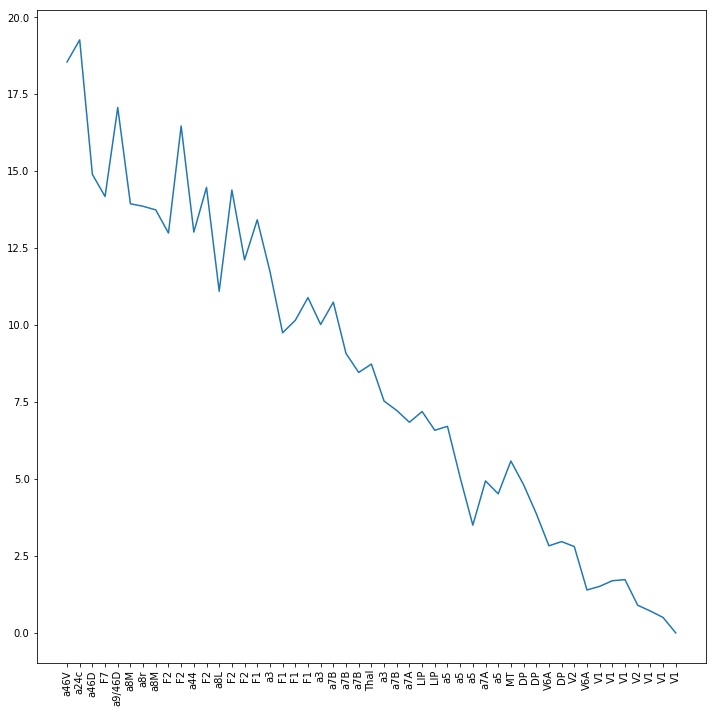

In [20]:
plt.figure(figsize=(12,12))
plt.plot(range(49), net.node_degree[:,1,500])
plt.xticks(range(49), net.session_info['areas'], rotation = 90)

In [21]:
net.session_info['channels_labels'].astype(int)

array([  1,   4,   9,  13,  16,  17,  22,  23,  26,  27,  29,  34,  39,
        43,  54,  63,  66,  92,  95, 105, 106, 110, 121, 122, 127, 128,
       132, 134, 135, 146, 148, 149, 150, 156, 161, 176, 177, 178, 183,
       201, 203, 205, 210, 219, 221, 224, 242, 248, 250])

In [22]:
net.session_info['channels_labels'].astype(int).shape

(49,)

In [23]:
net.super_tensor.shape

(1176, 4, 131760)

In [45]:
for i in range(244):
    w = net.super_tensor[:,0,i]>.7
    plot_edge_brain_sketch(net.session_info['pairs'], net.session_info['channels_labels'].astype(int), w)
    plt.savefig('figures/net_'+str(i)+'.png')
    plt.close()

In [38]:
w.min()

False

In [37]:
net.super_tensor[:,0,0].min()

0.12112201773561537